In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

In [2]:
dataset = pd.get_dummies(pd.read_csv("./ManualPreprocessedAmesHousingClassification.csv"))
dataset = dataset[['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF','SalePrice']]
dataset.head()

,Gr Liv Area,1st Flr SF,Garage Area,Overall Qual,Total Bsmt SF,SalePrice
0,1656,1656,528,6,1080,3.0
1,896,896,730,5,882,0.0
2,1329,1329,312,6,1329,2.0
3,2110,2110,522,7,2110,3.0
4,1629,928,482,5,928,2.0


In [3]:
# using kFold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=100, shuffle=True)
kf.get_n_splits(dataset)

10

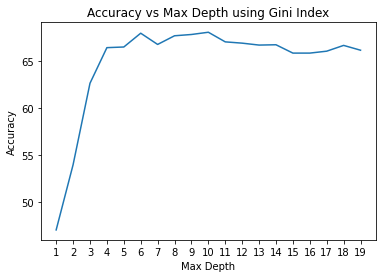

In [4]:
depth = range(1,20)
accuracy = []
for max_d in depth:
    avg_accuracy = 0
    for train, test in kf.split(dataset):
        train_data = dataset.iloc[train]
        test_data = dataset.iloc[test]
        dt = DecisionTreeClassifier(criterion='gini', max_depth=max_d, random_state=100)
        dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
        y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
        # find average
        avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    accuracy.append(avg_accuracy/10*100)
plt.plot(depth, accuracy)
plt.xticks(depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth using Gini Index')
plt.show()

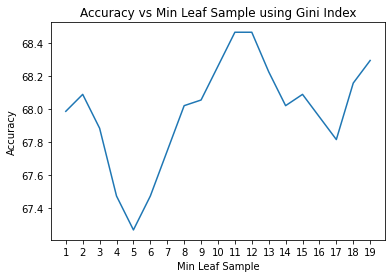

In [5]:
minLeafSample = range(1,20)
accuracy = []
for sample in minLeafSample:
    avg_accuracy = 0
    for train, test in kf.split(dataset):
        train_data = dataset.iloc[train]
        test_data = dataset.iloc[test]
        dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=sample, random_state=100)
        dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
        y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
        # find average
        avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    accuracy.append(avg_accuracy/10*100)
plt.plot(depth, accuracy)
plt.xticks(depth)
plt.xlabel('Min Leaf Sample')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Leaf Sample using Gini Index')
plt.show()

In [19]:
avg_accuracy = 0
print("10 Fold Cross Validation Using Gini Index, Max Depth 6, Min Leaf Sample 11")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=100, min_samples_leaf=11)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("\tAverage accuracy is ", avg_accuracy/10*100)

avg_accuracy = 0
print("10 Fold Cross Validation Using Entropy, Max Depth 6, Min Leaf Sample 11")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100, min_samples_leaf=11)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("\tAverage accuracy is ", avg_accuracy/10*100)

10 Fold Cross Validation Using Gini Index, Max Depth 6, Min Leaf Sample 11
	Average accuracy is  68.4641638225256
10 Fold Cross Validation Using Entropy, Max Depth 6, Min Leaf Sample 11
	Average accuracy is  67.16723549488054


10 Fold Cross Validation Using Entropy, Max Depth 6, Min Leaf Sample 11
Average accuracy is  67.16723549488054


In [15]:
# Best Max Depth is 10, using Gini Index
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1240, min_samples_leaf=11)
dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
print("Accuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)

Accuracy is  67.57679180887372


In [12]:
class_names = ['0', '1', '2', '3']
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names = train_data.drop('SalePrice', axis=1).columns,
                                class_names = class_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data) 
graph.render("dt-max5-gini")

'dt-max5-gini.pdf'